<a href="https://colab.research.google.com/github/kayteeflick/nma_cn_flow_state/blob/psds/PSDs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

General functions to use in all notebooks

Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Data retrieval - spikes

In [56]:
import os, requests

fname = []
for j in range(3):
  fname.append('steinmetz_part%d.npz'%j)
url = ["https://osf.io/agvxh/download"]
url.append("https://osf.io/uv3mw/download")
url.append("https://osf.io/ehmw2/download")

for j in range(len(url)):
  if not os.path.isfile(fname[j]):
    try:
      r = requests.get(url[j])
    except requests.ConnectionError:
      print("!!! Failed to download data !!!")
    else:
      if r.status_code != requests.codes.ok:
        print("!!! Failed to download data !!!")
      else:
        with open(fname[j], "wb") as fid:
          fid.write(r.content)

alldat = np.array([])
for j in range(len(fname)):
  alldat = np.hstack((alldat, np.load('steinmetz_part%d.npz'%j, allow_pickle=True)['dat']))

Data retrieval - LFP

In [2]:
import os, requests

fname = ['steinmetz_st.npz']
fname.append('steinmetz_wav.npz')
fname.append('steinmetz_lfp.npz')

url = ["https://osf.io/4bjns/download"]
url.append("https://osf.io/ugm9v/download")
url.append("https://osf.io/kx3v9/download")

for j in range(len(url)):
  if not os.path.isfile(fname[j]):
    try:
      r = requests.get(url[j])
    except requests.ConnectionError:
      print("!!! Failed to download data !!!")
    else:
      if r.status_code != requests.codes.ok:
        print("!!! Failed to download data !!!")
      else:
        with open(fname[j], "wb") as fid:
          fid.write(r.content)

dat_LFP = np.load('steinmetz_lfp.npz', allow_pickle=True)['dat']


Functions

In [3]:
def sel_neurons():
  print('todo')
  return

def spks_to_rate(spks):
  print('todo')
  return

def bandpass_lfp(lfp):
  print('todo')
  return

In [36]:
dat_LFP.shape
#Each session has a different number of brain areas recorded

(39,)

In [4]:
dat = dat_LFP[11]['lfp']

In [29]:
dat_LFP[11]['brain_area_lfp'][7]

'CA1'

In [5]:
psds = np.empty((dat.shape))

for i in range(dat.shape[0]):
  for j in range(dat.shape[1]):
    psds[i,j] = np.abs(np.fft.fft(dat[i,j]))
psd_f = np.fft.fftfreq(dat.shape[2], 0.01)[:int(psds.shape[2]/2)]
psds = psds[:,:,:int(psds.shape[2]/2)]

In [10]:
psds.shape

(12, 340, 125)

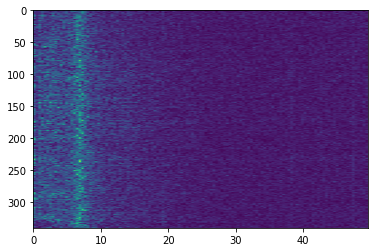

In [26]:
plt.imshow(psds[7], aspect='auto', extent=[psd_f[0], psd_f[-1], psds.shape[1], 0])

Text(0.5, 0, 'freq (Hz)')

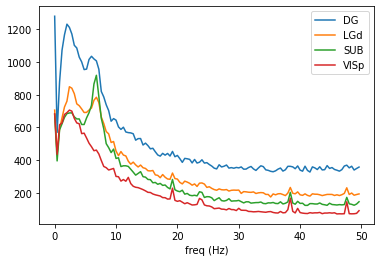

In [35]:
for i in range(4):
  plt.plot(psd_f, np.mean(psds, axis=1)[i], label=dat_LFP[11]['brain_area_lfp'][i])
plt.legend()
plt.xlabel('freq (Hz)')

Text(0.5, 0, 'freq (Hz)')

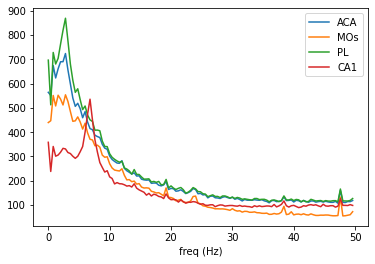

In [32]:
for i in range(4, 8):
  plt.plot(psd_f, np.mean(psds, axis=1)[i], label=dat_LFP[11]['brain_area_lfp'][i])
plt.legend()
plt.xlabel('freq (Hz)')

Text(0.5, 0, 'freq (Hz)')

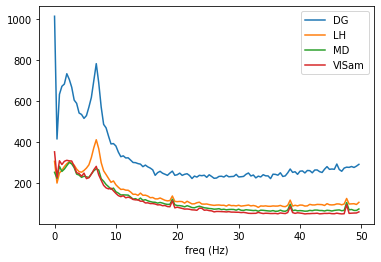

In [33]:
for i in range(8, 12):
  plt.plot(psd_f, np.mean(psds, axis=1)[i], label=dat_LFP[11]['brain_area_lfp'][i])
plt.legend()
plt.xlabel('freq (Hz)')

Looking at noise in LFP

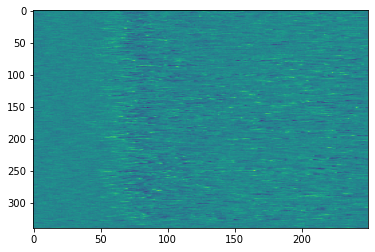

In [51]:
plt.imshow(dat[4], aspect='auto')

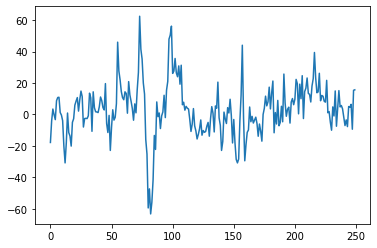

In [55]:
plt.plot(dat[4][120])